<a href="https://colab.research.google.com/github/ov29/Dataset__Penguins/blob/main/Dataset__Penguins_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **IOT Data visualization  Dataset "Penguins"**





In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




> **1. Read the penguins_size.csv file and define the penguin species type as an index.**



In [ ]:
# read the csv file and set the index as 'species'
penguins_df = pd.read_csv('penguins_size.csv', index_col='species')

# print the first 5 rows of the dataframe
print(penguins_df.head(5))

            island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species                                                                    
Adelie   Torgersen              39.1             18.7              181.0   
Adelie   Torgersen              39.5             17.4              186.0   
Adelie   Torgersen              40.3             18.0              195.0   
Adelie   Torgersen               NaN              NaN                NaN   
Adelie   Torgersen              36.7             19.3              193.0   

         body_mass_g     sex  
species                       
Adelie        3750.0    MALE  
Adelie        3800.0  FEMALE  
Adelie        3250.0  FEMALE  
Adelie           NaN     NaN  
Adelie        3450.0  FEMALE  




> **2. Using "sns.pairplot" from seaborn, visualize statistics giving the different characteristics of penguins (culmen_length_mm, culmen_depth_mm 
flipper_length_mm, body_mass_g) according to their species (see seaborn hue
parameter.**



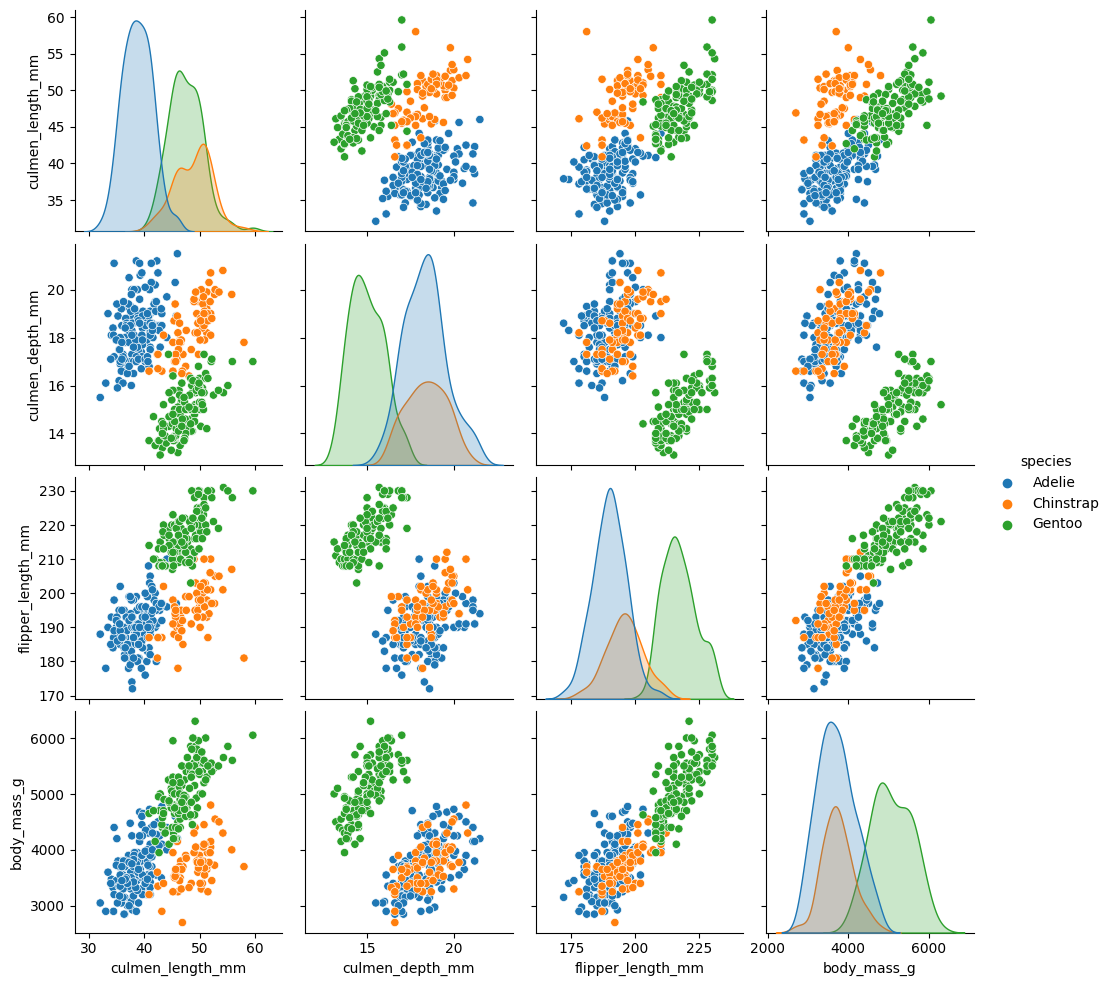

In [ ]:
# use sns.pairplot to visualize the data
sns.pairplot(data=penguins_df, hue='species', 
             vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])




> **3. Give statistics about null values in the dataset.**



In [ ]:

# check for null values in each column
null_counts = penguins_df.isnull().sum()

# print the null value statistics
print("Null value statistics:")
print(null_counts)


Null value statistics:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64




> **4. Visualize with a pie chart the proportion of each species in the dataset.**



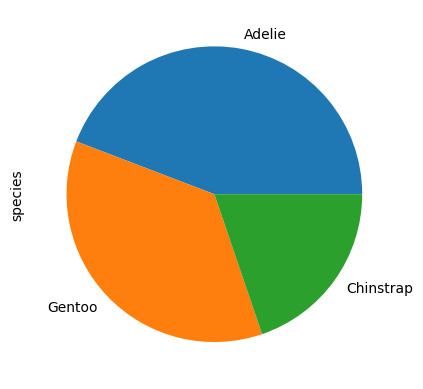

In [ ]:
species_counts = penguins_df ['species'].value_counts().plot(kind = "pie")



> **5. Visualize using a pie chart the proportion (in numbers) of each species in the dataset.**



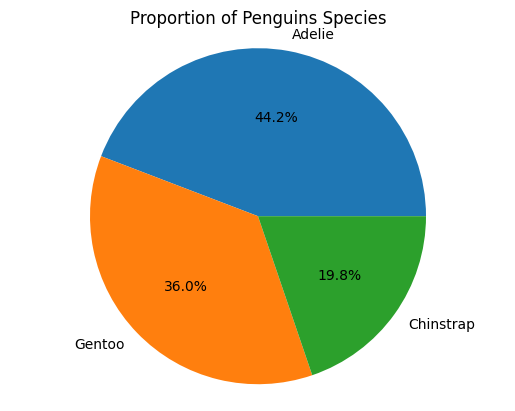

In [ ]:
# count the number of penguins in each species
species_counts = penguins_df['species'].value_counts()

# create a pie chart of the species proportions
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Penguins Species')
plt.axis('equal')
plt.show()




> **6. Visualize using a pie chart the proportion in geographical location of each species in the dataset.**



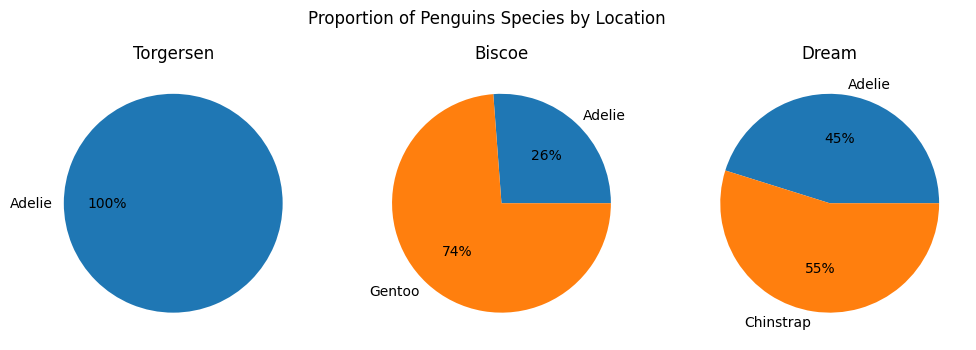

In [ ]:
# count the number of penguins in each species for each location
location_species_counts = penguins_df.groupby(['island', 'species']).size()

# create pie charts of the species proportions for each location
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, island in enumerate(penguins_df['island'].unique()):
    ax = axs[i]
    species_counts = location_species_counts[island]
    ax.pie(species_counts, labels=species_counts.index, autopct='%1.0f%%')
    ax.set_title(island)

plt.suptitle('Proportion of Penguins Species by Location')
plt.show()





> **7. Visualize with scatter plot the size of the culmen and its depth according to the species.**



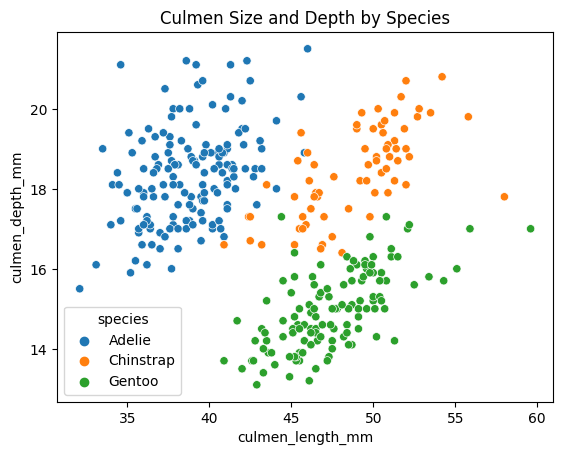

In [ ]:
# create scatter plot of culmen_length_mm and culmen_depth_mm
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=penguins_df)
plt.title('Culmen Size and Depth by Species')
plt.show()




> **8. Visualize in the form of a histogram the length of the fins of all species combined.**


<ipython-input-24-940c284128c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins_df['flipper_length_mm'])


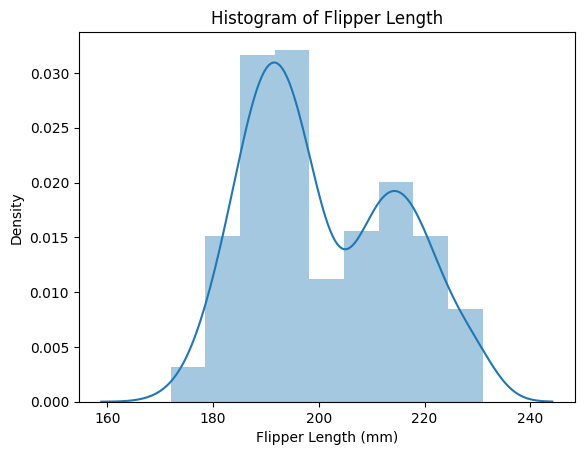

In [ ]:
# create histogram of flipper_length_mm
sns.distplot(penguins_df['flipper_length_mm'])
plt.title('Histogram of Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.show()




> **9. Visualize in histogram form the length of the fins according to the species.**



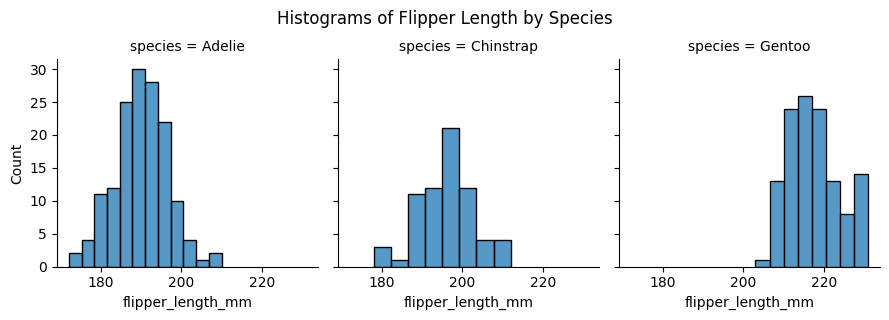

In [ ]:
# create a FacetGrid with a histogram of flipper_length_mm for each species
g = sns.FacetGrid(penguins_df, col='species')
g.map(sns.histplot, 'flipper_length_mm')
plt.suptitle('Histograms of Flipper Length by Species', y=1.05)
plt.show()




> **10. Visualize fin lengths according to species using violin points (learn about Seaborn's violinplot).**



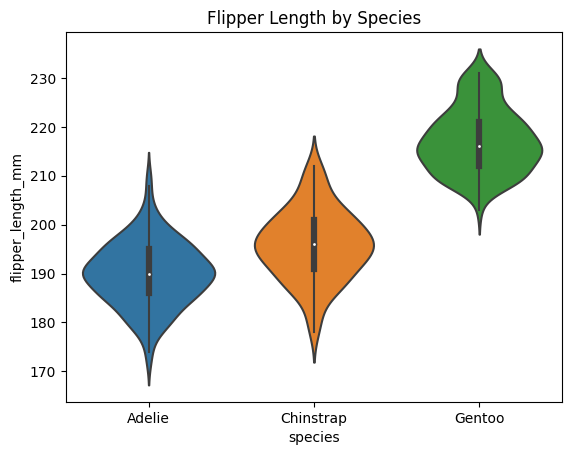

In [ ]:
# create a violin plot of flipper_length_mm by species
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df)
plt.title('Flipper Length by Species')
plt.show()




> **11. Using the heatmap function and the data.corr() function, visualize the correlation between the different variables: culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g.**



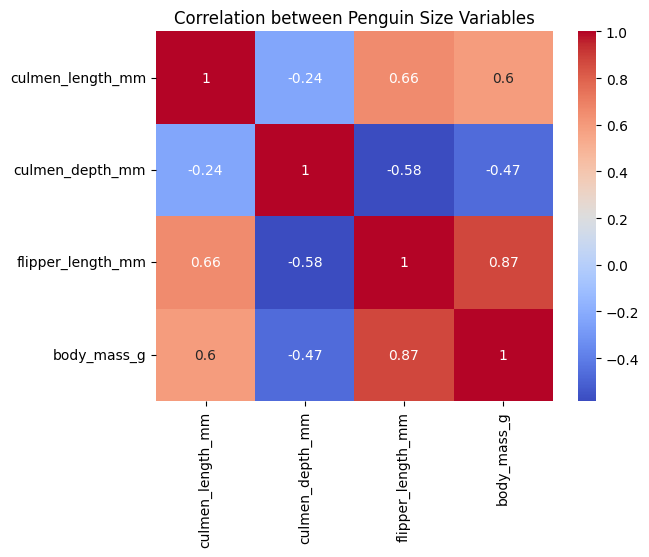

In [ ]:
# create a heatmap of the correlation matrix
corr_matrix = penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Penguin Size Variables')
plt.show()
